In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
!ls dataset/Tomato_Leaf_Diseases/

Testing_Set  Training_Set


In [3]:
train_data_path = "dataset/Tomato_Leaf_Diseases/Training_Set/"
test_data_path = "dataset/Tomato_Leaf_Diseases/Testing_Set/"

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True, 
                                   vertical_flip=True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
training_set = train_datagen.flow_from_directory(train_data_path,
                                                 target_size = (224, 224),
                                                 batch_size = 200,
                                                 class_mode = 'categorical')

Found 21882 images belonging to 5 classes.


In [7]:
testing_set = valid_datagen.flow_from_directory(test_data_path,
                                            target_size = (224, 224),
                                            batch_size = 70,
                                            class_mode = 'categorical')

Found 7001 images belonging to 5 classes.


In [8]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print(physical_devices)
tf.config.experimental.set_memory_growth(physical_devices[0], True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [17]:
model = keras.Sequential([
    layers.Input((224, 224, 3)),
    layers.Conv2D(20, kernel_size=(5, 5), activation="relu"), # 224, 224, 3 => 220, 220, 20
    layers.MaxPooling2D((2, 2)), # 220, 220, 20 => 110, 110, 20
    layers.Conv2D(20, kernel_size=(7, 7), strides=(2, 2), activation="relu"), # 110, 110, 20 => 52, 52, 20
    layers.Conv2D(20, kernel_size=(3, 3), activation="relu"), # 52, 52, 20 => 50, 50, 20
    layers.MaxPooling2D((2, 2)), # 50, 50, 20 => 25, 25, 20
    layers.Conv2D(20, kernel_size=(7, 7), activation="relu"), # 25, 25, 20 => 19, 19, 20
    layers.MaxPooling2D((2, 2)), # 19, 19, 20, => 8, 8, 20 
    layers.Conv2D(10, kernel_size=(1, 1), activation="relu"), # 8, 8, 20 => 8, 8, 10
    layers.Flatten(),
    layers.Dense(32, activation="relu"),
    layers.Dense(5, activation="softmax")
])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 220, 220, 20)      1520      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 20)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 20)        19620     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 20)        3620      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 20)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 19, 19, 20)        19620     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 9, 9, 20)         

In [75]:
model = keras.models.load_model("0.880val_accuracy")

In [77]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001, decay=0.00001), loss=keras.losses.categorical_crossentropy,
             metrics=["accuracy"])

In [20]:
model.fit(training_set, validation_data=testing_set, epochs=15)

Epoch 1/15
50/50 [==============================] - 118s 2s/step - loss: 1.4303 - accuracy: 0.4291 - val_loss: 1.3301 - val_accuracy: 0.4999
Epoch 2/15
50/50 [==============================] - 125s 2s/step - loss: 1.2454 - accuracy: 0.5038 - val_loss: 1.1125 - val_accuracy: 0.5502
Epoch 3/15
50/50 [==============================] - 131s 3s/step - loss: 1.0264 - accuracy: 0.5716 - val_loss: 0.8596 - val_accuracy: 0.6275
Epoch 4/15
50/50 [==============================] - 132s 3s/step - loss: 0.8487 - accuracy: 0.6424 - val_loss: 0.7319 - val_accuracy: 0.7006
Epoch 5/15
50/50 [==============================] - 135s 3s/step - loss: 0.7168 - accuracy: 0.7154 - val_loss: 1.2754 - val_accuracy: 0.6025
Epoch 6/15
50/50 [==============================] - 138s 3s/step - loss: 0.8657 - accuracy: 0.6576 - val_loss: 0.8414 - val_accuracy: 0.6608
Epoch 7/15
50/50 [==============================] - 144s 3s/step - loss: 0.6388 - accuracy: 0.7412 - val_loss: 0.5110 - val_accuracy: 0.7972
Epoch 8/15
50

In [26]:
import matplotlib.pyplot as plt
#plt.plot(model.history.epoch)
model.history.epoch[3]
#plt.plot(model.history["val_accuracy"])

IndexError: list index out of range

In [53]:
model.save("0.772val_accuracy")

INFO:tensorflow:Assets written to: 0.772val_accuracy/assets


In [59]:
mod4 = model.fit(training_set, validation_data=testing_set, epochs=20, batch_size=1500)

Epoch 1/20
110/110 [==============================] - 220s 2s/step - loss: 0.3405 - accuracy: 0.8218 - val_loss: 0.8806 - val_accuracy: 0.8634
Epoch 2/20
110/110 [==============================] - 218s 2s/step - loss: 0.2813 - accuracy: 0.8327 - val_loss: 0.9383 - val_accuracy: 0.8467
Epoch 3/20
110/110 [==============================] - 221s 2s/step - loss: 0.2912 - accuracy: 0.8356 - val_loss: 0.8577 - val_accuracy: 0.8622
Epoch 4/20
110/110 [==============================] - 221s 2s/step - loss: 0.2958 - accuracy: 0.8317 - val_loss: 0.7842 - val_accuracy: 0.8540
Epoch 5/20
110/110 [==============================] - 221s 2s/step - loss: 0.2736 - accuracy: 0.8390 - val_loss: 0.8851 - val_accuracy: 0.8707
Epoch 6/20
110/110 [==============================] - 223s 2s/step - loss: 0.2751 - accuracy: 0.8418 - val_loss: 0.9390 - val_accuracy: 0.8493
Epoch 7/20
110/110 [==============================] - 219s 2s/step - loss: 0.2781 - accuracy: 0.8367 - val_loss: 0.7681 - val_accuracy: 0.8192

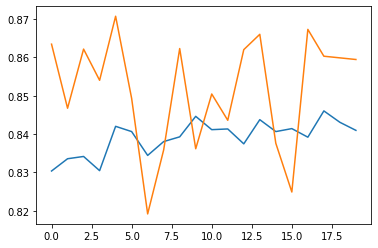

In [60]:
plt.plot(mod4.history["accuracy"])
plt.plot(mod4.history["val_accuracy"])

In [63]:
model.save("0.880val_accuracy")

INFO:tensorflow:Assets written to: 0.880val_accuracy/assets


Epoch 1/50
110/110 [==============================] - 208s 2s/step - loss: 0.2695 - accuracy: 0.8442 - val_loss: 1.0132 - val_accuracy: 0.8199
Epoch 2/50
110/110 [==============================] - 213s 2s/step - loss: 0.2595 - accuracy: 0.8475 - val_loss: 0.9283 - val_accuracy: 0.8693
Epoch 3/50
110/110 [==============================] - 212s 2s/step - loss: 0.2715 - accuracy: 0.8443 - val_loss: 0.8053 - val_accuracy: 0.8512
Epoch 4/50
110/110 [==============================] - 212s 2s/step - loss: 0.2620 - accuracy: 0.8473 - val_loss: 0.8440 - val_accuracy: 0.8744
Epoch 5/50
110/110 [==============================] - 208s 2s/step - loss: 0.2730 - accuracy: 0.8406 - val_loss: 0.7263 - val_accuracy: 0.8567
Epoch 6/50
110/110 [==============================] - 212s 2s/step - loss: 0.2581 - accuracy: 0.8486 - val_loss: 0.8405 - val_accuracy: 0.8769
Epoch 7/50
110/110 [==============================] - 210s 2s/step - loss: 0.2581 - accuracy: 0.8497 - val_loss: 0.9074 - val_accuracy: 0.8636

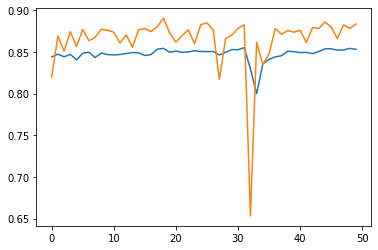

In [62]:
mod4 = model.fit(training_set, validation_data=testing_set, epochs=50, batch_size=1500)
plt.plot(mod4.history["accuracy"])
plt.plot(mod4.history["val_accuracy"])

In [108]:
# messed up, reverting to last save
#model = keras.models.load_model("0.75val_accuracy")
model = keras.models.load_model("0.79val_accuracy")
model.evaluate(testing_set)

101/101 [==============================] - 16s 159ms/step - loss: 0.5646 - accuracy: 0.7976


[0.5645787119865417, 0.7976003289222717]

In [83]:
opt_to_jump = keras.optimizers.SGD(learning_rate=0.00005, momentum=0.05, nesterov=True)

In [352]:
opt_to_jump = keras.optimizers.Ftrl(learning_rate=0.00000000009, learning_rate_power=-0.9)

In [90]:
opt_to_jump = keras.optimizers.Adam(learning_rate=0.001)

In [91]:
model.compile(optimizer=opt_to_jump, loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [94]:
mod = model.fit(training_set, epochs=5,)

Epoch 1/5
110/110 [==============================] - 260s 2s/step - loss: 0.2565 - accuracy: 0.8459
Epoch 2/5
110/110 [==============================] - 267s 2s/step - loss: 0.2600 - accuracy: 0.8431
Epoch 3/5
110/110 [==============================] - 260s 2s/step - loss: 0.2504 - accuracy: 0.8491
Epoch 4/5
110/110 [==============================] - 260s 2s/step - loss: 0.2638 - accuracy: 0.8472
Epoch 5/5
110/110 [==============================] - 256s 2s/step - loss: 0.2593 - accuracy: 0.8498


KeyError: 'val_accuracy'

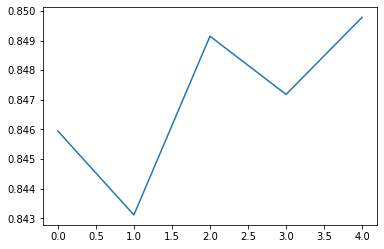

In [95]:
plt.plot(mod.history["accuracy"])
plt.plot(mod.history["val_accuracy"])

In [361]:
model.predict(testing_set)

array([[1.1138927e-07, 2.5823203e-04, 5.9253915e-05, ..., 1.4466515e-07,
        2.4553095e-05, 2.0054825e-01],
       [2.8942095e-03, 4.3654460e-03, 6.8975314e-05, ..., 7.3502028e-01,
        2.0310204e-01, 4.4520104e-10],
       [2.9697223e-02, 7.0439887e-01, 2.0466702e-01, ..., 7.5629971e-04,
        1.8782004e-07, 3.3057745e-08],
       ...,
       [1.4792320e-06, 1.1702653e-01, 5.9807044e-01, ..., 6.3953063e-05,
        1.2388363e-09, 7.2458912e-05],
       [4.6474255e-05, 3.0361882e-03, 8.9163547e-03, ..., 8.6443550e-05,
        4.3901221e-07, 2.8806123e-01],
       [3.0547944e-06, 9.9899981e-04, 4.9790519e-06, ..., 1.2136498e-05,
        6.8145618e-04, 7.0652300e-03]], dtype=float32)

In [116]:
a = next(testing_set)

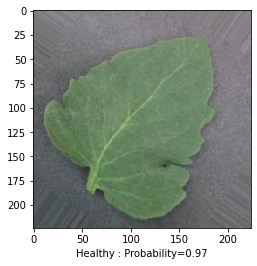

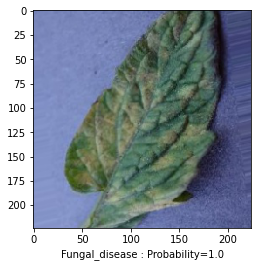

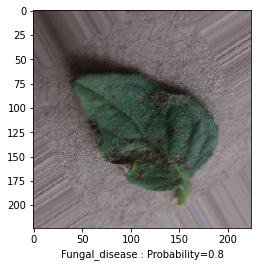

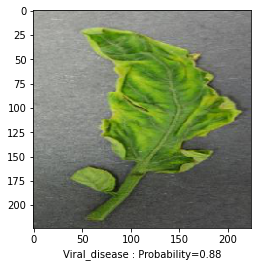

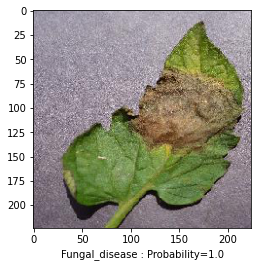

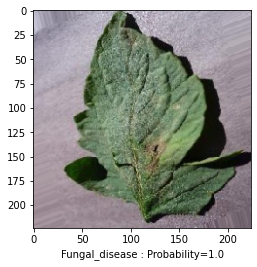

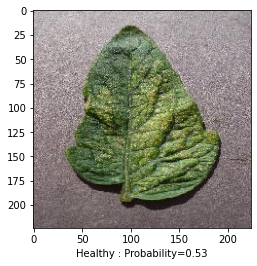

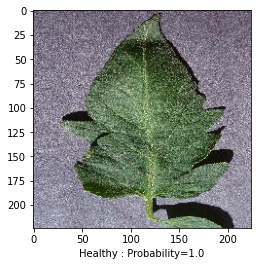

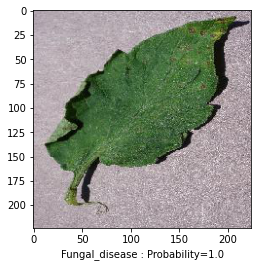

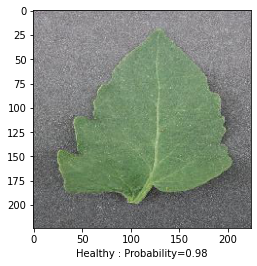

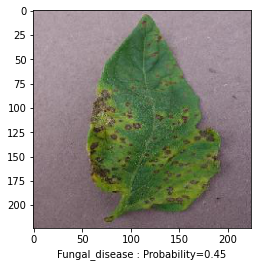

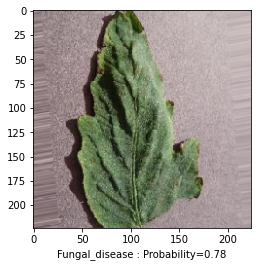

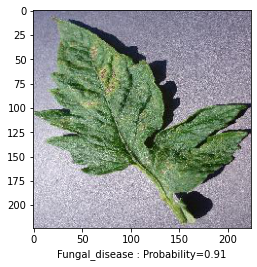

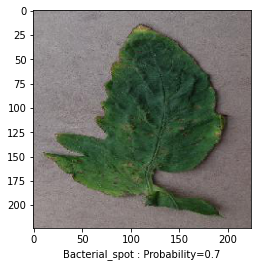

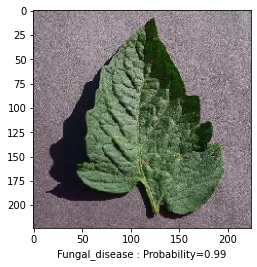

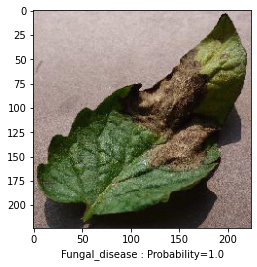

In [117]:
import numpy as np
prediction = model.predict(a[0])
for im, i in zip(a[0][:16], range(16)):
    plt.figure()
    plt.imshow(im)
    pp = i
    lis = []
    for i in prediction[pp]:
        lis.append(round(i, 2))
    prob = max(lis)

    plt.xlabel(list(testing_set.class_indices.keys())[np.argmax(prediction[pp])]+" : Probability="+str(prob))
    

#print(prediction)

In [430]:
import numpy as np
pp = 14
print(list(testing_set.class_indices.keys())[np.argmax(prediction[pp])])
lis = []
for i in prediction[pp]:
    lis.append(round(i, 2))
print(max(lis))

Tomato___healthy
0.96


In [ ]:
labels = 